In [2]:
import pandas as pd
from sklearn import metrics
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler

# Exo 1

## Question 1

In [3]:
X, y, w = make_regression(
    n_samples=200, n_features=20, coef=True, random_state=1, bias=3.5, noise=0.01
)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9)

## Question 2

In [4]:

reg = LinearRegression()
reg.fit(X_train, y_train)
print("score:",reg.score(X_train, y_train))

score: 0.9999999977315733


## Question 3

In [5]:
y_predict=reg.predict(X_test)

zero=np.zeros(len(y_test))
norm= mean_squared_error(zero, y_test,squared=False)
print(" error new data:",mean_squared_error(y_test, y_predict,squared=False)/norm)

 error new data: 6.0265745407772026e-05


# Exo 2

## Question 1

In [278]:
X2, y2, w = make_regression(
    n_samples=500, n_features=800, coef=True, random_state=1,effective_rank=200, bias=0.0, noise=0.001
)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2,train_size=0.9)



## Question 2

In [279]:
Linear2 = LinearRegression().fit(X_train2, y_train2)
print("score:",Linear2.score(X_train2, y_train2))

regRidge = Ridge(alpha=0.1).fit(X_train2, y_train2)
print("score:",regRidge.score(X_train2, y_train2))

score: 1.0
score: 0.957460042531894


## Question 3

In [280]:
y_predictLin=Linear2.predict(X_test2)
zero=np.zeros(len(y_test2))
norm= mean_squared_error(zero, y_test2,squared=False)

print(" error new data:",mean_squared_error(y_test2, y_predictLin,squared=False)/norm)

y_predictRidge=regRidge.predict(X_test2)

print(" error new data:",mean_squared_error(y_test2, y_predictRidge,squared=False)/norm)

 error new data: 0.7262915139844839
 error new data: 0.7463410769735113


## Question 4

In [281]:
tab_alphas=[0.01,0.1,1.0]

clf = RidgeCV(alphas=tab_alphas).fit(X_train2, y_train2)
print("score: ",clf.score(X_train2, y_train2))


score:  0.9750807401688085


In [282]:
regRidge2 = Ridge(alpha=clf.alpha_).fit(X_train2, y_train2)
print("score:",regRidge2.score(X_train2, y_train2))

y_predict3=regRidge2.predict(X_test2)

print(" error new data:",mean_squared_error(y_test2, y_predict3,squared=False)/norm)

score: 0.9750807401688081
 error new data: 0.7373486751058139


# Exo 3

## Question 1

In [213]:
from sklearn.datasets import load_diabetes
from sklearn.ensemble import VotingRegressor
from sklearn.kernel_ridge import KernelRidge

diabetes = load_diabetes()
Xd, yd = diabetes.data, diabetes.target

Xd_train, Xd_test, yd_train, yd_test = train_test_split(Xd, yd, train_size=0.97)

In [214]:
reg1 = LinearRegression()
reg2 = KernelRidge(kernel="linear",alpha=0.1)
reg3 = KernelRidge(kernel="polynomial",alpha=0.1)
reg4 = KernelRidge(kernel="polynomial",alpha=0.01)
reg5 = KernelRidge(kernel="rbf",alpha=0.1)
reg6 = KernelRidge(kernel="rbf",alpha=0.01)

reg1.fit(Xd_train, yd_train)
reg2.fit(Xd_train, yd_train)
reg3.fit(Xd_train, yd_train)
reg4.fit(Xd_train, yd_train)
reg5.fit(Xd_train, yd_train)
reg6.fit(Xd_train, yd_train)


V=VotingRegressor([("lin", reg1),("lin_a0p1", reg2),("pol_a0p1", reg3),("pol_a0p01", reg4),("rbf_a0p1", reg5),("rnf_a0p01", reg6)])
V.fit(Xd_train, yd_train)

VotingRegressor(estimators=[('lin', LinearRegression()),
                            ('lin_a0p1', KernelRidge(alpha=0.1)),
                            ('pol_a0p1',
                             KernelRidge(alpha=0.1, kernel='polynomial')),
                            ('pol_a0p01',
                             KernelRidge(alpha=0.01, kernel='polynomial')),
                            ('rbf_a0p1', KernelRidge(alpha=0.1, kernel='rbf')),
                            ('rnf_a0p01',
                             KernelRidge(alpha=0.01, kernel='rbf'))])

In [215]:
pred1 = reg1.predict(Xd_test)
pred2 = reg2.predict(Xd_test)
pred3 = reg3.predict(Xd_test)
pred4 = reg4.predict(Xd_test)
pred5 = reg5.predict(Xd_test)
pred6 = reg6.predict(Xd_test)
pred7 = V.predict(Xd_test)

print(" error new data rbf :",mean_squared_error(yd_test, pred6,squared=False))
print(" error new data voting:",mean_squared_error(yd_test, pred7,squared=False))

 error new data rbf : 65.4587710382044
 error new data voting: 78.52450865349923


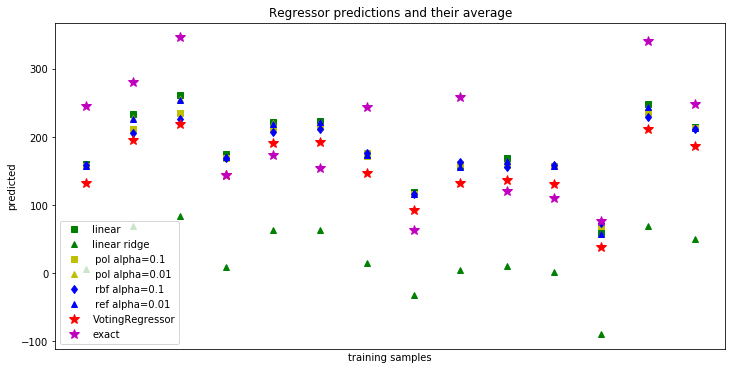

In [216]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(pred1, "gs", label="linear")
plt.plot(pred2, "g^", label="linear ridge")
plt.plot(pred3, "ys", label=" pol alpha=0.1")
plt.plot(pred4, "y^", label=" pol alpha=0.01")
plt.plot(pred5, "bd", label=" rbf alpha=0.1")
plt.plot(pred6, "b^", label=" ref alpha=0.01")
plt.plot(pred7, "r*", ms=10, label="VotingRegressor")
plt.plot(yd_test, "m*", ms=10, label="exact")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their average")

plt.show()

## Question 2

In [217]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

parameters = {'alpha':[0.001,0.0025,0.005,0.01,0.025,0.05,0.1,0.2,0.5,1.0]}
reg = Lasso()
clf = GridSearchCV(reg, parameters)
clf.fit(Xd_train, yd_train)

y_predict_final=clf.predict(Xd_test)

zero=np.zeros(len(yd_test))
norm= mean_squared_error(zero, yd_test,squared=False)
print(" error new data:",mean_squared_error(yd_test, y_predict_final,squared=False)/norm)

 error new data: 0.29841540319646964
